In [3]:
# Import libraries

import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [20]:
# Load input csv (energia and meteo)
df_energia_2021 = pd.read_csv('../input/energia_202109-202112.csv', encoding='latin-1', na_values=["", "NaN", ""])
df_energia_2022 = pd.read_csv('../input/energia_202201-202212.csv', encoding='latin-1', na_values=["", "NaN", ""])
df_meteo_2021 = pd.read_csv('../input/meteo_202109-202112.csv', encoding='latin-1', na_values=["", "NaN", ""])
df_meteo_2022 = pd.read_csv('../input/meteo_202201-202212.csv', encoding='latin-1', na_values=["", "NaN", ""])

train_energia = pd.concat([df_energia_2021, df_energia_2022])
train_meteo = pd.concat([df_meteo_2021, df_meteo_2022])

test_energia_X = pd.read_csv('../input/energia_202301-202304.csv', encoding='latin-1')
test_meteo_X = pd.read_csv('../input/meteo_202301-202304.csv', encoding='latin-1')

In [21]:
'''
Inspect data
'''
print(train_energia.columns)
print(train_meteo.columns)


Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')


In [22]:

train_energia.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,NaN
1,2021-09-29,1,0.0,0.0,0.0,NaN
2,2021-09-29,2,0.0,0.0,0.0,NaN
3,2021-09-29,3,0.0,0.0,0.0,NaN
4,2021-09-29,4,0.0,0.0,0.0,NaN


In [23]:
train_meteo.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [24]:
print(train_energia.info())
print(test_energia_X.info())
print("----------------------------------------------")
print(train_meteo.info())
print(test_meteo_X.info())

'''
In energy dataset, there are no null entries, and the values are distinct!
In meteo dataset, there are null entries in columns sea_level, grnd_level, and rain_1h, the first two all of them being null
'''

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 602.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económic

'\nIn energy dataset, there are no null entries, and the values are distinct!\nIn meteo dataset, there are null entries in columns sea_level, grnd_level, and rain_1h, the first two all of them being null\n'

In [25]:
print(train_energia.nunique())
print(train_meteo.nunique())

Data                        459
Hora                         24
Normal (kWh)               1282
Horário Económico (kWh)     851
Autoconsumo (kWh)           752
Injeção na rede (kWh)         4
dtype: int64
dt                     11688
dt_iso                 11688
city_name                  1
temp                    2423
feels_like              2702
temp_min                 488
temp_max                 550
pressure                  41
sea_level                  0
grnd_level                 0
humidity                  82
wind_speed               771
rain_1h                  371
clouds_all               101
weather_description        8
dtype: int64


In [17]:
print(train_energia.describe())
print("----------------------------------------")
print(train_meteo.describe())

'''
Description of each of the datasets
'''

               Hora  Normal (kWh)  Horário Económico (kWh)  Autoconsumo (kWh)
count  11016.000000  11016.000000             11016.000000       11016.000000
mean      11.500000      0.202278                 0.159714           0.117314
std        6.922501      0.349478                 0.271792           0.176762
min        0.000000      0.000000                 0.000000           0.000000
25%        5.750000      0.000000                 0.000000           0.000000
50%       11.500000      0.000000                 0.000000           0.000000
75%       17.250000      0.314000                 0.288000           0.227000
max       23.000000      3.251000                 6.978000           1.192000
----------------------------------------
                 dt          temp    feels_like      temp_min      temp_max  \
count  1.168800e+04  11688.000000  11688.000000  11688.000000  11688.000000   
mean   1.651491e+09     16.406638     16.076164     14.433353     17.502990   
std    1.214705e+07 

'\nDescription of each of the datasets\n'

In [18]:
'''
Rename columns
'''
train_energia.rename(columns={"Hora": "hora", "Normal (kWh)": "normal", "Horário Económico (kWh)": "horario", "Autoconsumo (kWh)": "autoconsumo"}, inplace=True)
print(train_energia.describe())


               hora        normal       horario   autoconsumo
count  11016.000000  11016.000000  11016.000000  11016.000000
mean      11.500000      0.202278      0.159714      0.117314
std        6.922501      0.349478      0.271792      0.176762
min        0.000000      0.000000      0.000000      0.000000
25%        5.750000      0.000000      0.000000      0.000000
50%       11.500000      0.000000      0.000000      0.000000
75%       17.250000      0.314000      0.288000      0.227000
max       23.000000      3.251000      6.978000      1.192000


<AxesSubplot: ylabel='autoconsumo'>

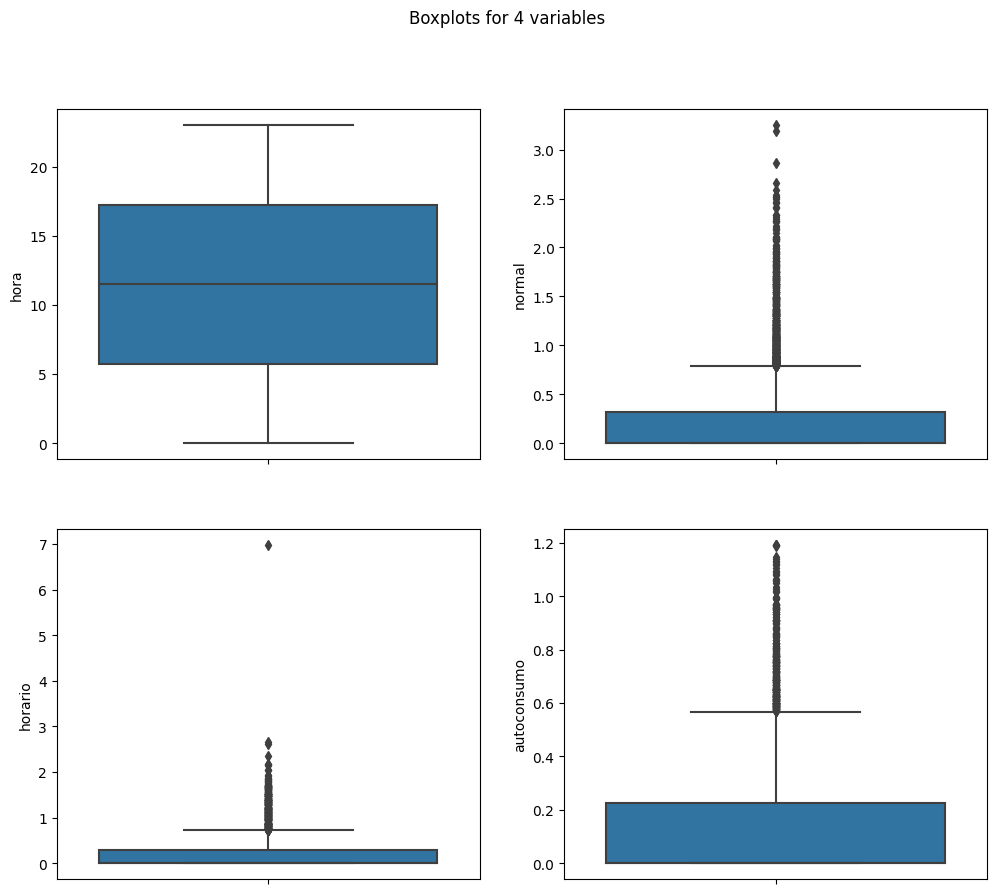

In [46]:
'''
Visualizing the distribution and spotting potential outliers for each column using boxplots
'''
#plt.figure(figsize=(15, 8))
fig, axs = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle('Boxplots for 4 variables')
sns.boxplot(y=train_energia['hora'], ax=axs[0,0])
sns.boxplot(y=train_energia['normal'], ax=axs[0,1])
sns.boxplot(y=train_energia['horario'], ax=axs[1,0])
sns.boxplot(y=train_energia['autoconsumo'], ax=axs[1,1])
#sns.boxplot(data=train_energia)
#plt.title("Boxplot of Columns")
#plt.show()

<Figure size 1200x600 with 0 Axes>

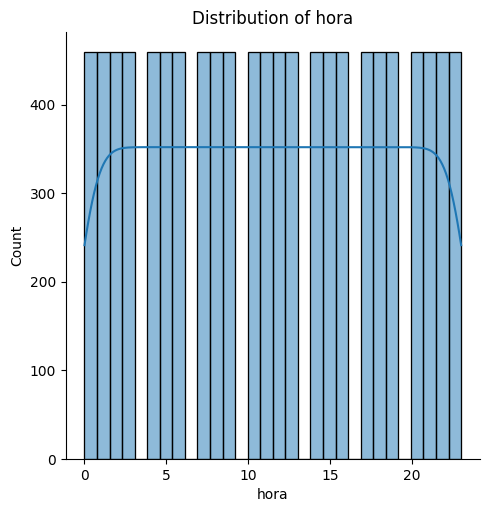

<Figure size 1200x600 with 0 Axes>

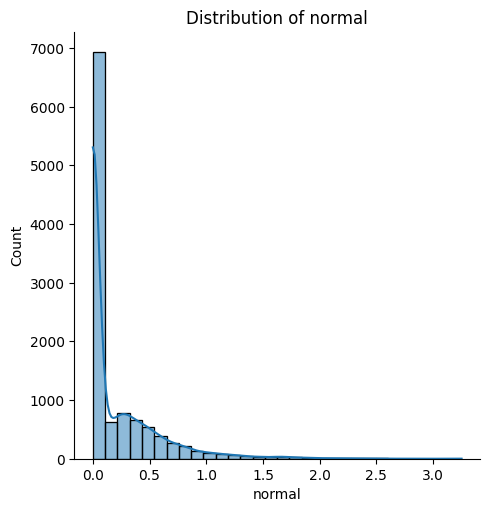

<Figure size 1200x600 with 0 Axes>

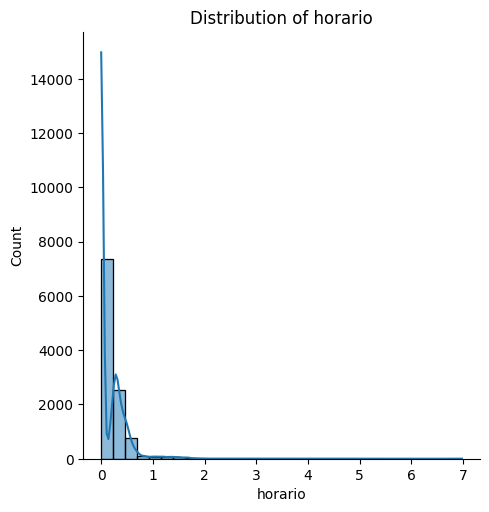

<Figure size 1200x600 with 0 Axes>

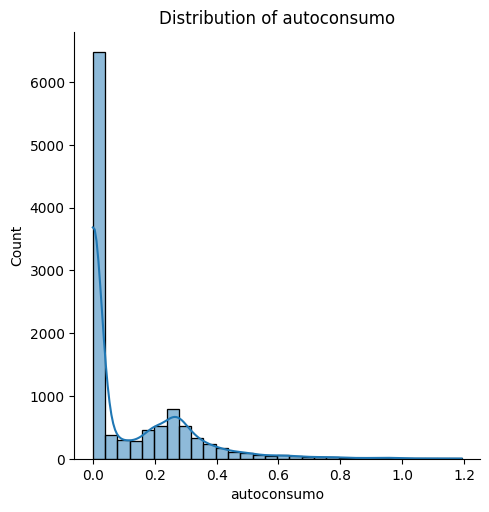

In [38]:
cols = ['hora', 'normal', 'horario', 'autoconsumo']

for col in cols:
    plt.figure(figsize=(12, 6))
    sns.displot(train_energia[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

Data                      object
hora                       int64
normal                   float64
horario                  float64
autoconsumo              float64
Injeção na rede (kWh)     object
dtype: object


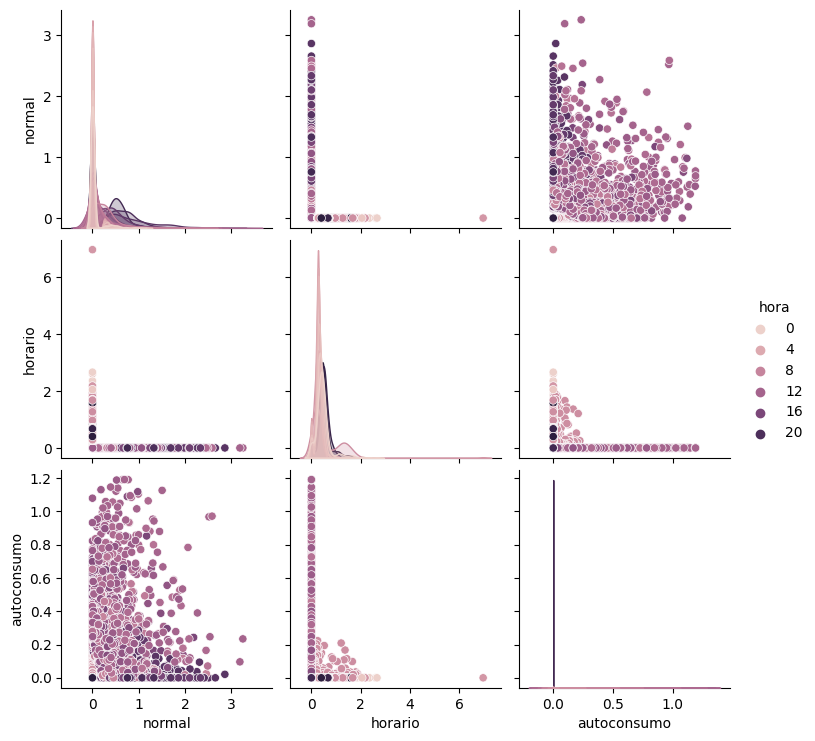

In [43]:
print(train_energia.dtypes)
sns.pairplot(train_energia, hue='hora')
plt.show()

In [44]:
'''
Grouping
'''

train_energia.groupby(by=['hora']).mean(numeric_only=True)

# Clearly there is a relation between 'hora' and all the other numeric variables

,normal,horario,autoconsumo
hora,,,
0,0.039843,0.456608,0.000000
1,0.035129,0.379765,0.000000
2,0.028098,0.328736,0.000000
3,0.025974,0.293590,0.000000
4,0.025183,0.271693,0.000000
5,0.024449,0.258573,0.000000
6,0.025113,0.293434,0.002024
7,0.030601,0.573277,0.035553
8,0.277786,0.000000,0.148113


C:\Users\Ordep\AppData\Local\Temp\ipykernel_20408\119478703.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_energia.corr()


<AxesSubplot: >

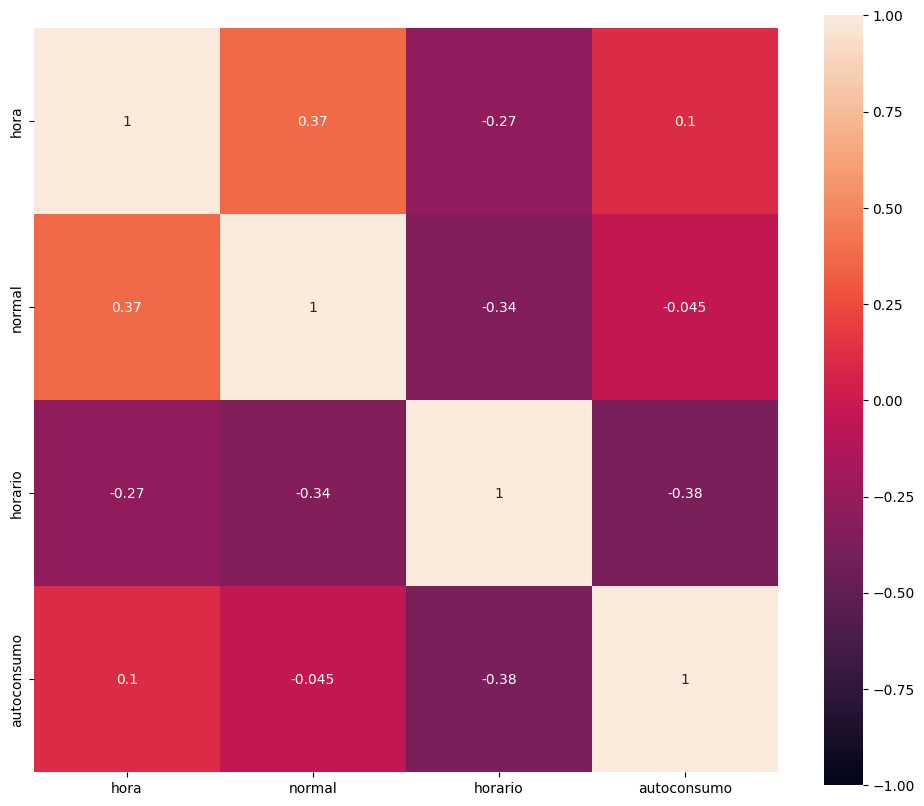

In [49]:
'''
Correlation matrix
'''
corr_matrix = train_energia.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

# It seems that there isn't a big correlation between any variable